#### SORU 1 - ANAMOLİ TESPİT ALGORİTMASI - ISOLATION FOREST

In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [351]:
df = pd.read_excel("C:\\Users\\zinci\\Downloads\\hackathon 2024 - Yapay Zeka.xlsx")
df.head()


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701


In [276]:
def check_df(dataFrame, head=5):
    print("####### Shape #######")
    print(dataFrame.shape)
    print("####### Type ########")
    print(dataFrame.dtypes)
    print("####### Tail ########")
    print(dataFrame.tail(head))
    print("####### Quantiles ########")
    print(dataFrame.describe().T)

In [277]:
check_df(df)

####### Shape #######
(35429, 4)
####### Type ########
TIME_STAMP     datetime64[ns]
SERVER_NAME            object
DOWNLOAD              float64
UPLOAD                float64
dtype: object
####### Tail ########
               TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD
35424 2023-11-02 10:30:00  10.0.901.xx Server 1  14604.990  364.365
35425 2023-11-02 10:25:00  10.0.901.xx Server 1  14461.797  358.717
35426 2023-11-02 10:20:00  10.0.901.xx Server 1  14381.373  357.816
35427 2023-11-02 10:15:00  10.0.901.xx Server 1  14336.298  355.811
35428 2023-11-02 10:10:00  10.0.901.xx Server 1  14611.335  357.395
####### Quantiles ########
              count                           mean                  min  \
TIME_STAMP    35429  2024-01-03 13:59:16.925117696  2023-11-02 10:10:00   
DOWNLOAD    35427.0                    19052.25109             2335.885   
UPLOAD      35427.0                     482.140941               57.749   

                            25%                  50% 

In [278]:
df.isnull().sum()

TIME_STAMP     0
SERVER_NAME    0
DOWNLOAD       2
UPLOAD         2
dtype: int64

In [352]:
# Eksik değerleri medyan ile doldurma
df[['DOWNLOAD', 'UPLOAD']] = df[['DOWNLOAD', 'UPLOAD']].fillna(df[['DOWNLOAD', 'UPLOAD']].median())


In [280]:
df.isnull().sum()

TIME_STAMP     0
SERVER_NAME    0
DOWNLOAD       0
UPLOAD         0
dtype: int64

In [353]:
df['TIME_STAMP'] = pd.to_datetime(df['TIME_STAMP'])

# Hafta içi/hafta sonu bilgisi ekleyelim
df['WEEKDAY'] = df['TIME_STAMP'].dt.dayofweek
df['IS_WEEKEND'] = np.where(df['WEEKDAY'] >= 5, 1, 0)

# Saat bilgisini ekleyelim
df['HOUR'] = df['TIME_STAMP'].dt.hour

# Saat ve dakika bilgilerini ekleyelim
df['HOUR'] = df['TIME_STAMP'].dt.hour
df['MINUTE'] = df['TIME_STAMP'].dt.minute


In [354]:
from datetime import date

all_holidays = [
    date(2024, 1, 1),  # Yılbaşı
    date(2024, 4, 23),  # Ulusal Egemenlik ve Çocuk Bayramı
    date(2024, 5, 1),  # Emek ve Dayanışma Günü
    date(2024, 5, 19),  # Atatürk'ü Anma, Gençlik ve Spor Bayramı
    date(2024, 8, 30),  # Zafer Bayramı
    date(2024, 10, 29),  # Cumhuriyet Bayramı
    date(2024, 4, 10),  # Ramazan Bayramı 1. gün
    date(2024, 4, 11),  # Ramazan Bayramı 2. gün
    date(2024, 4, 12),  # Ramazan Bayramı 3. gün
    date(2024, 6, 28),  # Kurban Bayramı 1. gün
    date(2024, 6, 29),  # Kurban Bayramı 2. gün
    date(2024, 6, 30),  # Kurban Bayramı 3. gün
    date(2024, 7, 31)   # Kurban Bayramı 4. gün
]

In [358]:
df['is_holiday'] = df['TIME_STAMP'].dt.strftime('%Y-%m-%d').isin(all_holidays).astype(int)


In [359]:
df.head()

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,WEEKDAY,IS_WEEKEND,HOUR,MINUTE,is_holiday
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,1,0,18,25,0
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575,1,0,18,20,0
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144,1,0,18,15,0
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673,1,0,18,10,0
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701,1,0,18,5,0


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35429 entries, 0 to 35428
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   TIME_STAMP   35429 non-null  datetime64[ns]
 1   SERVER_NAME  35429 non-null  object        
 2   DOWNLOAD     35429 non-null  float64       
 3   UPLOAD       35429 non-null  float64       
 4   WEEKDAY      35429 non-null  int32         
 5   IS_WEEKEND   35429 non-null  int32         
 6   HOUR         35429 non-null  int32         
 7   MINUTE       35429 non-null  int32         
 8   is_holiday   35429 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(5), object(1)
memory usage: 1.8+ MB


Text(0, 0.5, 'Ortalama UPLOAD')

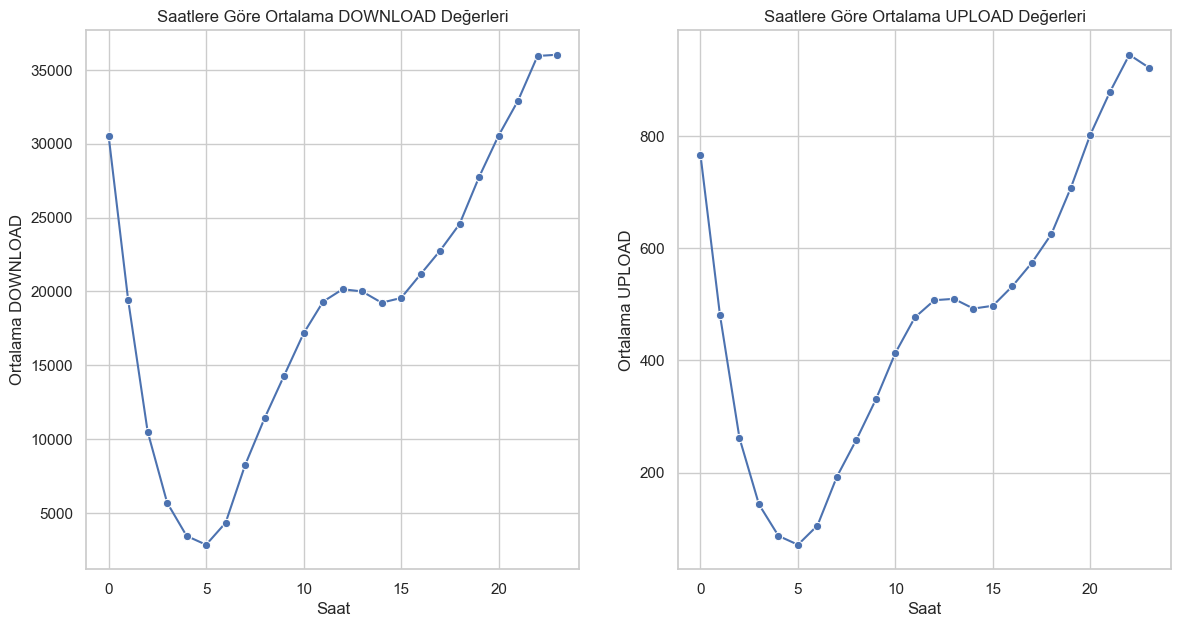

In [361]:
# Grafikler için stil ayarları
sns.set(style='whitegrid')

# Saatlere göre DOWNLOAD ve UPLOAD ortalamalarını hesaplayalım
hourly_data = df.groupby('HOUR').agg({'DOWNLOAD': 'mean', 'UPLOAD': 'mean'}).reset_index()

# Saatlere göre DOWNLOAD ve UPLOAD grafiklerini çizelim
plt.figure(figsize=(14, 7))

# DOWNLOAD grafiği
plt.subplot(1, 2, 1)
sns.lineplot(x='HOUR', y='DOWNLOAD', data=hourly_data, marker='o')
plt.title('Saatlere Göre Ortalama DOWNLOAD Değerleri')
plt.xlabel('Saat')
plt.ylabel('Ortalama DOWNLOAD')

# UPLOAD grafiği
plt.subplot(1, 2, 2)
sns.lineplot(x='HOUR', y='UPLOAD', data=hourly_data, marker='o')
plt.title('Saatlere Göre Ortalama UPLOAD Değerleri')
plt.xlabel('Saat')
plt.ylabel('Ortalama UPLOAD')

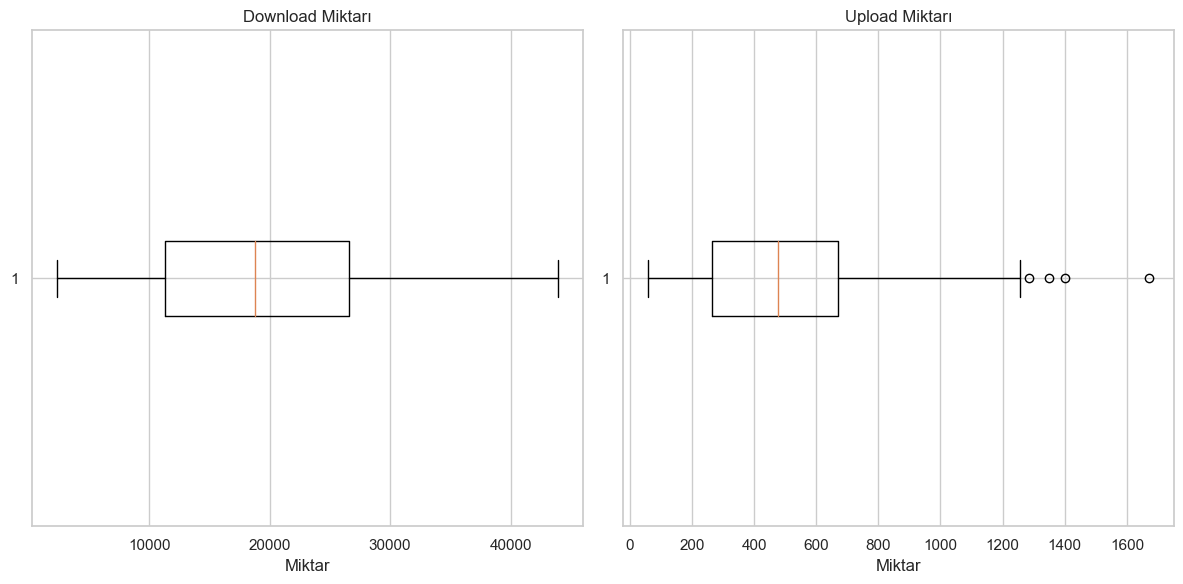

In [362]:
# Box-Plot'ları çizdirme
plt.figure(figsize=(12, 6))

# Download Box-Plot
plt.subplot(1, 2, 1)
plt.boxplot(df['DOWNLOAD'], vert=False)
plt.title('Download Miktarı')
plt.xlabel('Miktar')

# Upload Box-Plot
plt.subplot(1, 2, 2)
plt.boxplot(df['UPLOAD'], vert=False)
plt.title('Upload Miktarı')
plt.xlabel('Miktar')

plt.tight_layout()
plt.show()

In [363]:
# numeric özellikler feature olarak eklendi
features = df[['DOWNLOAD', 'UPLOAD', 'HOUR', 'MINUTE', 'WEEKDAY', 'IS_WEEKEND', "is_holiday"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [364]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(scaled_features)


IsolationForest(contamination=0.1, random_state=42)

In [365]:
df['ANOMALY'] = iso_forest.predict(scaled_features)
df['ANOMALY'] = df['ANOMALY'].map({1: 0, -1: 1})


In [291]:
df.head()

#2024-03-05 18:25:00 anomaly değildir olarak işaretlenmiştir.

,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,WEEKDAY,IS_WEEKEND,HOUR,MINUTE,is_holiday,ANOMALY
0,2024-03-05 18:25:00,10.0.901.xx Server 1,11927.017,424.700,1,0,18,25,False,0
1,2024-03-05 18:20:00,10.0.901.xx Server 1,19703.467,525.575,1,0,18,20,False,0
2,2024-03-05 18:15:00,10.0.901.xx Server 1,26349.663,631.144,1,0,18,15,False,0
3,2024-03-05 18:10:00,10.0.901.xx Server 1,26068.494,623.673,1,0,18,10,False,0
4,2024-03-05 18:05:00,10.0.901.xx Server 1,25814.357,620.701,1,0,18,5,False,0


In [370]:
anomalies = df[df['ANOMALY'] == 1]
print(anomalies)

               TIME_STAMP           SERVER_NAME   DOWNLOAD   UPLOAD  WEEKDAY  \
208   2024-03-05 00:55:00  10.0.901.xx Server 1  23133.599  544.206        1   
217   2024-03-05 00:05:00  10.0.901.xx Server 1  35242.403  864.854        1   
218   2024-03-05 00:00:00  10.0.901.xx Server 1  35069.264  475.543        1   
219   2024-03-04 23:55:00  10.0.901.xx Server 1  36465.555  876.046        0   
220   2024-03-04 23:50:00  10.0.901.xx Server 1  36632.550  880.686        0   
...                   ...                   ...        ...      ...      ...   
34978 2023-11-04 00:00:00  10.0.901.xx Server 1  35726.693  914.139        5   
34990 2023-11-03 23:00:00  10.0.901.xx Server 1  35481.155  922.319        4   
34995 2023-11-03 22:35:00  10.0.901.xx Server 1  38982.674  999.261        4   
35262 2023-11-03 00:05:00  10.0.901.xx Server 1  29674.646  739.171        4   
35263 2023-11-03 00:00:00  10.0.901.xx Server 1  30814.625  777.105        4   

       IS_WEEKEND  HOUR  MINUTE  is_hol

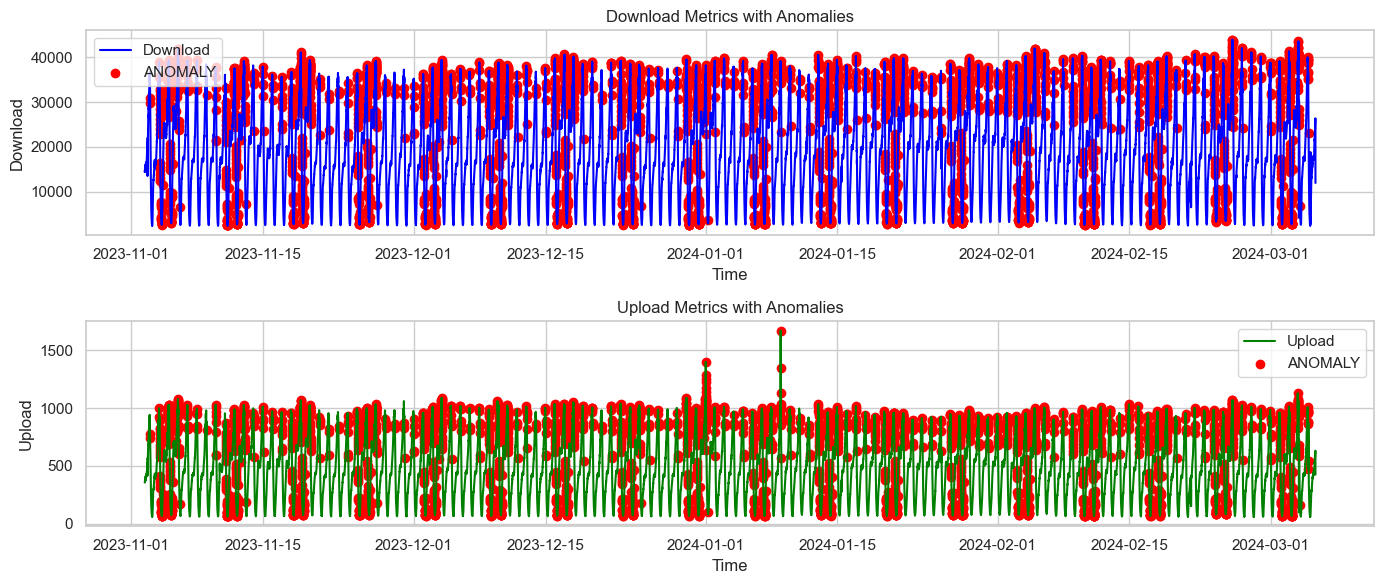

In [371]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(df['TIME_STAMP'], df['DOWNLOAD'], label='Download', color='blue')
plt.scatter(anomalies['TIME_STAMP'], anomalies['DOWNLOAD'], color='red', label='ANOMALY')
plt.title('Download Metrics with Anomalies')
plt.xlabel('Time')
plt.ylabel('Download')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['TIME_STAMP'], df['UPLOAD'], label='Upload', color='green')
plt.scatter(anomalies['TIME_STAMP'], anomalies['UPLOAD'], color='red', label='ANOMALY')
plt.title('Upload Metrics with Anomalies')
plt.xlabel('Time')
plt.ylabel('Upload')
plt.legend()

plt.tight_layout()
plt.show()

## EKSTRA 
#### K-MEANS 

c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

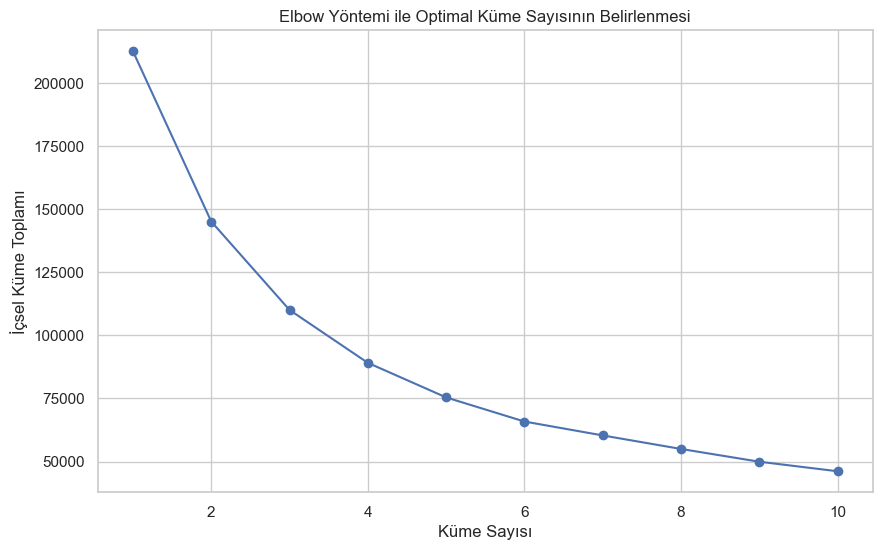

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score


# Özellikleri seçme
features = df[['DOWNLOAD', 'UPLOAD', 'HOUR', 'MINUTE', 'WEEKDAY', 'IS_WEEKEND']]


# Verileri ölçekleme
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow yöntemi ile en uygun küme sayısını belirleme
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('İçsel Küme Toplamı')
plt.title('Elbow Yöntemi ile Optimal Küme Sayısının Belirlenmesi')
plt.show()


In [137]:

# Silhouette yöntemi ile en uygun küme sayısını belirleme
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_features)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, labels))

optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_k)


c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\zinci\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

Optimal number of clusters: 4


In [99]:


# Seçilen küme sayısı ile KMeans uygulaması
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=0).fit(scaled_features)

# Her bir örneğin hangi kümeye ait olduğunu bulma
df['Cluster'] = kmeans.labels_

# Kümeler arasındaki uzaklıkları hesaplama
distances = pairwise_distances_argmin_min(scaled_features, kmeans.cluster_centers_)[1]

# Anomali olarak işaretleme
threshold = distances.mean() + distances.std()  # Ortalama + 1 standart sapma gibi bir eşik belirleme
df['Anomaly'] = distances > threshold

anomalies = df[df['Anomaly']]
anomalies


,TIME_STAMP,SERVER_NAME,DOWNLOAD,UPLOAD,WEEKDAY,IS_WEEKEND,HOUR,MINUTE,DOWNLOAD_Z,UPLOAD_Z,DOWNLOAD_ANOMALY,UPLOAD_ANOMALY,Cluster,Anomaly
28,2024-03-05 16:00:00,10.0.901.xx Server 1,20589.353,507.027,1,0,16,0,0.150546,0.092851,0,0,2,True
29,2024-03-05 15:55:00,10.0.901.xx Server 1,20238.693,492.582,1,0,15,55,0.116211,0.038937,0,0,2,True
40,2024-03-05 15:00:00,10.0.901.xx Server 1,17781.729,435.270,1,0,15,0,-0.124366,-0.174974,0,0,1,True
41,2024-03-05 14:55:00,10.0.901.xx Server 1,17620.846,429.920,1,0,14,55,-0.140119,-0.194942,0,0,1,True
52,2024-03-05 14:00:00,10.0.901.xx Server 1,17427.230,435.384,1,0,14,0,-0.159077,-0.174549,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35348,2023-11-02 16:55:00,10.0.901.xx Server 1,15010.705,444.240,3,0,16,55,-0.395694,-0.141495,0,0,1,True
35358,2023-11-02 16:00:00,10.0.901.xx Server 1,18587.611,473.359,3,0,16,0,-0.045457,-0.032811,0,0,2,True
35359,2023-11-02 15:55:00,10.0.901.xx Server 1,18179.391,463.189,3,0,15,55,-0.085428,-0.070770,0,0,1,True
35370,2023-11-02 15:00:00,10.0.901.xx Server 1,16465.944,426.523,3,0,15,0,-0.253202,-0.207621,0,0,1,True


In [80]:
new_data = {
    'TIME_STAMP': ['2024-03-05 18:25:00'],
    'SERVER_NAME': ['10.0.901.xx Server 1'],
    'DOWNLOAD': [11927.017],
    'UPLOAD': [424.700]
}
new_df = pd.DataFrame(new_data)

# Zaman bilgisini datetime formatına çevirme
new_df['TIME_STAMP'] = pd.to_datetime(new_df['TIME_STAMP'])
# saat ve dakika bilgilerini ekleyelim
new_df['HOUR'] = new_df['TIME_STAMP'].dt.hour
new_df['MINUTE'] = new_df['TIME_STAMP'].dt.minute

# Yeni veri için özellikleri seçme
new_features = new_df[['DOWNLOAD', 'UPLOAD', 'HOUR', 'MINUTE']] 

# Yeni veriyi ölçekleme
scaled_new_features = scaler.transform(new_features)

# Yeni veriyi kümelemede hangi merkeze en yakın olduğunu bulma
new_distance = pairwise_distances_argmin_min(scaled_new_features, kmeans.cluster_centers_)[1][0]

# Anomali kontrolü
is_anomaly = new_distance > threshold
print("Yeni veri anomali mi?:", is_anomaly)

Yeni veri anomali mi?: False
